### *Reading the libraries*

In [3]:
import numpy as np
import pandas as pd
import os
import os.path
from operator import add
from datetime import datetime, date, timedelta
from matplotlib import pyplot as plt

### *Seting up the display extent*

In [4]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',138)

## Step 1: Setting Up Climate Scenarios (CH2018, and Random Scenarios)

In [3]:
def is_leap(year):
    """ return true for leap years, False for non leap years """
    return year % 4 == 0 and ( year % 100 != 0 or year % 400 == 0)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

### S1.1. *Function that pruduces new climate (precipitation) realization*

In [4]:
def random_pcp(dfpcp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):
    
    #outFileName = OutFileName
    dfpcpCol = dfpcp.columns
    #sceNum = len(dfCol)

    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    from random import shuffle
    #a = []
    #for x in range(simLen): 
        #randomInd = [z for z in range(sceNum)]
        #shuffle(randomInd)
        #a.append(randomInd)
        
        
    a = []
    for i in range(simLen): 
        randomInd = [z for z in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
    
        
    RCP = RCPNames
    columnsDfpcp = ['sc_' + RCP + str(k) for k in range(1, sceNum+1,1)] 
    c = [[19810101 for p in range(sceNum)]]
    #df1 = 'df' + str(outDFNumber)
    df1pcp = pd.DataFrame(c, columns =columnsDfpcp)
    #df1.to_csv('SAeidVaghefimodified1111222.csv', index = False)

    c.clear()

    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1 # counter i; equal to simulation length (simLen)
            p += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                c.append(dfpcp[dfpcpCol[a[i]]].iloc[j].values) 
            i += 1
                
        #print(m) # this line show the progress of the work by typing the years of simulation

        dfnewpcp = 'df' + str(m)
        dfnewpcp = pd.DataFrame(c, columns =columnsDfpcp)
        c.clear()
        df1pcp = df1pcp.append(dfnewpcp, ignore_index=True)
        
    return df1pcp

### S1.2. *Function that pruduces new climate (temperature) realization*

In [5]:
def random_tmp(dftmp, FirstYear, LastYear, ScenarioNumbers, RCPNames, Xfactor1):

    #dfCol = df.columns
    #sceNum = len(dfCol) // 2
    sceNum = ScenarioNumbers
    firstYear = FirstYear
    lastYear = LastYear
    simLen = lastYear - firstYear + 1

    dftmpColMax = dftmp.columns[[i for i in range(0, sceNum*2, 2)]]
    dftmpColMin = dftmp.columns[[i for i in range(1, sceNum*2, 2)]]

    ## yek list be toole 119 ke dakhelesh list haye 68 ta ee darim be soorate random
    from random import shuffle
    #a = []
    #for i in range(simLen): 
        #randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        #shuffle(randomInd)
        #a.append(randomInd)
        
    
    a = []
    for i in range(simLen): 
        randomInd = [j for j in range(sceNum)]
        #x = [[i] for i in range(10)] 
        for x in range(int(round(Xfactor1))):
            shuffle(randomInd)
        a.append(randomInd)
    
        
    #print('end!')

    cT = []
    RCP = RCPNames
    columnsDfOdd = ['sc_' + RCP + str(k)  for k in range(1, sceNum+1,1)] 
    columnsDfEven = [""] * sceNum

    columnsDftmp = []
    #colOdd = ['Scr_' + str(i) for i in range(1, sceNum+1, 1)]
    #colEven = ['' for i in range(1, sceNum+1,1)]

    for i in range (sceNum):
        columnsDftmp.append(columnsDfOdd[i])
        columnsDftmp.append(columnsDfEven[i])


    #### OR:
    #columnsDf = ["Sr", ""] * sceNum
    df1tmp = pd.DataFrame(cT, columns =columnsDftmp)
    #df1.to_csv("rrrrrrrrmodified1111222.csv", index = False)


    cMax = [[19810101 for p in range(sceNum)]]
    cMin = [["" for p in range(sceNum)]]
    i = 0
    p = 1
    for m in range(firstYear, lastYear + 1, 1):
        if is_leap(m):
            for j in range(((m - firstYear)*365+p) , ((m - firstYear)*365+367+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values) 
    
            i += 1

        else:
            for j in range(((m - firstYear)*365+p), ((m - firstYear)*365+366+p-1), 1):
                cMax.append(dftmp[dftmpColMax[a[i]]].iloc[j].values)
                cMin.append(dftmp[dftmpColMin[a[i]]].iloc[j].values)

            i += 1

        c = []
        for y in range(0, len(cMax), 1): # the length of simulation years
            for z in range(sceNum): # range(4)
                c.append(cMax[y][z])
                c.append(cMin[y][z])

        cMax.clear()
        cMin.clear()

        cMain = []
        cMain = list(chunks(c, sceNum * 2))
        #print(m) # this line show the progress of the work by typing the years of simulation

    ### Should be checked

        dfnewtmp = 'dftmp' + str(m)
        #columnsDf = ["Sr", ""]*sceNum
        #columnsDf = [['sc_' + str(k), ""] for k in range(1, sceNum+1,1)] 
        dfnewtmp = pd.DataFrame(cMain, columns =columnsDftmp)
        c.clear()
        df1tmp = df1tmp.append(dfnewtmp, ignore_index=True)
        
    return df1tmp

### S1.3. *Function that calls the random_pcp and random_tmp for all stations of a Ski resort*

In [6]:
def randomness_pcp_tmp(fnames, Xfactor1):
    for f in fnames:
        if 'p.csv' in f:
            print('Writing pcp files started!')
            #df = pd.read_csv('47-0625000_8-6666667p.csv')
            dfpcp = pd.read_csv(f)


            filt1 = dfpcp.columns.str.contains('RCP26|_26_') #12
            filt2 = dfpcp.columns.str.contains('RCP45|_45_') #25
            filt3 = dfpcp.columns.str.contains('RCP85|_85_') #31

            dfpcpRCP26 = dfpcp.loc[:, filt1]
            dfpcpRCP45 = dfpcp.loc[:, filt2]
            dfpcpRCP85 = dfpcp.loc[:, filt3]

            dfpcpRCP26_n = random_pcp(dfpcpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dfpcpRCP45_n = random_pcp(dfpcpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dfpcpRCP85_n = random_pcp(dfpcpRCP85, 1981, 2099, 31, '85_', Xfactor1)


            result = pd.concat([dfpcpRCP26_n, dfpcpRCP45_n, dfpcpRCP85_n], axis=1, sort=False)
            #result.to_csv('47-0625000_8-6666667p_n1.csv', index = False)


            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)
            root = os.getcwd()
            
            '''This part makes a new dir for outouts''' ## should be cooment out later
            #if os.path.isdir(os.path.join(root, 'Outputs_randomness')):
                #pass
            #else: os.mkdir(os.path.join(root, 'Outputs_randomness'))

            #outfolder = os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written

            filepath = os.path.join(outfolder, newName)

            result.to_csv(filepath, index = False)
            print('End of writing pcp files!')
            #print("--- %s seconds ---" % (time.time() - start_time))


        elif 't.csv' in f:
            print('Writing tmp files started!')
            dftmp = pd.read_csv(f)
            dftmpCol = list(dftmp.columns)

            filt1_max = [dftmpCol.index(s) for s in dftmpCol if ("_26_") in s or ("RCP26") in s]
            filt2_max = [dftmpCol.index(s) for s in dftmpCol if ("_45_") in s or ("RCP45") in s]
            filt3_max = [dftmpCol.index(s) for s in dftmpCol if ("_85_") in s or ("RCP85") in s]

            aOnefilt1= [1]*len(filt1_max)
            aOnefilt2= [1]*len(filt2_max)
            aOnefilt3= [1]*len(filt3_max)

            filt1_min = list(map(add, filt1_max, aOnefilt1)) # 
            filt2_min = list(map(add, filt2_max, aOnefilt2))
            filt3_min = list(map(add, filt3_max, aOnefilt3))

            filt1Tot = []
            for i in range(len(filt1_max)):
                filt1Tot.append(filt1_max[i])
                filt1Tot.append(filt1_min[i])

            filt2Tot = []
            for j in range(len(filt2_max)):
                filt2Tot.append(filt2_max[j])
                filt2Tot.append(filt2_min[j])

            filt3Tot = []
            for k in range(len(filt3_max)):
                filt3Tot.append(filt3_max[k])
                filt3Tot.append(filt3_min[k])

            dftmpRCP26 = dftmp[dftmp.columns[filt1Tot]]
            dftmpRCP45 = dftmp[dftmp.columns[filt2Tot]]
            dftmpRCP85 = dftmp[dftmp.columns[filt3Tot]]

            dftmpRCP26_n = random_tmp (dftmpRCP26, 1981, 2099, 12, '26_', Xfactor1)
            dftmpRCP45_n = random_tmp (dftmpRCP45, 1981, 2099, 25, '45_', Xfactor1)
            dftmpRCP85_n = random_tmp (dftmpRCP85, 1981, 2099, 31, '85_', Xfactor1)

            result = pd.concat([dftmpRCP26_n, dftmpRCP45_n, dftmpRCP85_n], axis=1, sort=False)

            #ewName = 'n'+f
            #ilepath = os.path.join(os.environ.get('HOME'), newName)
            #esult.to_csv(filepath, index = False)

            #newName = 'n_'+ f
            newName = f
            #filepath = os.path.join(os.getcwd(), newName)

            #outfolder =os.path.join(os.getcwd(), 'Outputs_randomness')
            outfolder =os.path.join(os.getcwd()) # we want the results to be over written
            
            filepath = os.path.join(outfolder, newName)
            result.to_csv(filepath, index = False)

            print('End of writing tmp files')

        else :
            pass

## Step 2: Function for initiating the main dictionary of climate stations

In [7]:
def create_dic(a):
    '''Function: creating a dictionary for each climate station'''
    
    a = {}
    keys = ['fM', 'iPot', 'rSnow', 'dSnow', 'cPrec', 'dP', 'elev', 'lat', 'long', 'fileName']
    a = {key: None for key in keys}
    return a

def initialize_input_dict (mainFolderSki):
    ''' This function returns a dictionary , and addresses of 4 folders'''
    
    
    '''Step 1''' 
    rootFolder = mainFolderSki
    inputFolder = os.path.join(rootFolder,'input')
    ablationFolder = os.path.join(inputFolder, 'Ablation')
    accumulationFolder = os.path.join(inputFolder, 'Accumulation')
    climate_ref_Folder = os.path.join(inputFolder, 'Climate_ref')
    
    
    '''Step 2: Reading all files names inside the Ablation, Accumulation, and Climate folders'''  
    ablationFiles = []
    for filename in os.walk(ablationFolder):
        ablationFiles = filename[2]
    
    accumulationFiles = list()
    for filename in os.walk(accumulationFolder):
        accumulationFiles = filename[2]

    climate_ref_Files = list()
    for filename in os.walk(climate_ref_Folder):
        climate_ref_Files = filename[2]
        
        
    '''Step 3: Reading files inside ablation folder '''
    os.chdir(ablationFolder)
    with open(ablationFiles[0], 'r') as file:
        FM1 = file.read()
    with open(ablationFiles[1], 'r') as file:
        Ipot1 = file.read()
    with open(ablationFiles[2], 'r') as file:
        Rsnow1 = file.read()
        
        
    '''Step 4: Reading the lines of files inside ablation folder'''
    FM1 = FM1.replace('\n', '\t')
    FM1 = FM1.split('\t')
    Ipot1 = Ipot1.replace('\n', '\t').split('\t')
    Rsnow1 = Rsnow1.replace('\n', '\t').split('\t')
        
        
    '''Step 5: Reading the lines of files inside accumulation folder''' 
    os.chdir(accumulationFolder)
    
    with open(accumulationFiles[0], 'r') as file:
        cPrec = file.read()
    with open(accumulationFiles[1], 'r') as file:
        dSnow1 = file.read()
    
    cPrec = cPrec.replace('\n', '\t')
    cPrec = cPrec.split('\t')
    dSnow1 = dSnow1.replace('\n', '\t').split('\t')
    
    
    '''Step 6: Reading the lines of files inside climate folder''' 
    os.chdir(climate_ref_Folder)
    
    with open('pcp.txt', 'r') as file:
        pcpData = file.read()
    with open('tmp.txt', 'r') as file:
        tmpData = file.read()
        
    pcpData = pcpData.split('\n')
    
    for i in range(len(pcpData)):
        pcpData[i] = pcpData[i].split(',')
        
        
    '''Step 7: Initialazing the input dictionary of climate stations which holds the information of accumulation
     and ablation, and etc of the stations''' 
    nameStn = []
    for file in climate_ref_Files:
        if 'p.csv' in file:
            #nameStn.append('n_' + file[-25: -5])
            nameStn.append(file[-25: -5])

    stnDicts = []
    for i in range(len(nameStn)):
        stnDicts.append(create_dic(nameStn[i]))
    
    
    '''Step 8: Assigning the file names to the dictionary'''
    for i in range (len(nameStn)):
        stnDicts[i]['fileName'] = nameStn[i]

    
    '''Step 9: Assigning the accumulation and ablation values'''
    for stnDict in stnDicts:
        for i, element in enumerate(FM1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['fM'] = FM1[i+1]
                
        for i, element in enumerate(Ipot1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['iPot'] = Ipot1[i+1]

        for i, element in enumerate(Rsnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:  
                stnDict['rSnow'] = Rsnow1[i+1]

        for i, element in enumerate(dSnow1):
            if element == stnDict['fileName'][:]:
            #if element == stnDict['fileName'][2:]:
                stnDict['dSnow'] = dSnow1[i+1]

        for i, element in enumerate(cPrec):
            stnDict['cPrec'] = cPrec[1]
            stnDict['dP'] = cPrec[3]
            
    '''Step 10: Assigning the elevation, Lat and long to the dictionaries'''
    for i in range(len(stnDicts)):
        for j in range(1, len(pcpData)):
            
            #if pcpData[j][1][2:-1] == stnDicts[i]['fileName'][2:]:
            if pcpData[j][1][:-1] == stnDicts[i]['fileName'][:]:
                stnDicts[i]['lat']= pcpData[j][2]
                stnDicts[i]['long']= pcpData[j][3]
                stnDicts[i]['elev']= pcpData[j][4]
                
    return stnDicts, inputFolder, ablationFolder, accumulationFolder, climate_ref_Folder

## Step 3: Main Snow Model

#### S3.1 *Initializiing the main dictionary for a case study*

In [8]:
caseStudyStns = {}
inputFolder = ''
ablationFolder = ''
accumulationFolder = ''
climateFolder = ''
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case2_Atzmaening'
#root = 'C:/Users/ashrafse/SA_2/snowModelUZH/case6_davos_elevations'
root = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2'

## calling the function with multiple return values
caseStudyStns, inputFolder, ablationFolder, accumulationFolder, climateFolder = initialize_input_dict(root)

#### S3.2 *Check if we have initialized correctly*

In [9]:
climateFolder

'C:\\Users\\ashrafse\\SA_2\\snowModelUZH\\case3_hoch-ybrig_v3_2\\input\\Climate_ref'

In [10]:
caseStudyStns

[{'fM': '1.012',
  'iPot': '1000',
  'rSnow': '0.5',
  'dSnow': '0.5',
  'cPrec': '0',
  'dP': '0',
  'elev': '1755',
  'lat': '47.00',
  'long': '8.7708333',
  'fileName': '47-0000000_8-7708333'}]

In [11]:
caseStudyStns[0].get("fM")

'1.012'

#### defing the X variables which control modeling (hyper parameter)

In [12]:
X2 = caseStudyStns[0].get("fM") # change 0 to i for all stations
X3 = caseStudyStns[0].get("iPot")
X4 =  caseStudyStns[0].get("rSnow")

In [13]:
print(X2)
print(X3)
print(X4)

1.012
1000
0.5


#### S3.3 *Function that runs the main model*

In [14]:
## 1st column as index: makaing date from 01 01 1981 to 2099 12 31
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date ).days + 1)):
        yield start_date + timedelta(n)

In [15]:
def policy_release(x1):
    return x1

In [25]:
def snow_Model (x1 = 250, Xfactor1 = None,  X2 = None, X3 = None, X4 = None, X5= 8):

    
    ''' VERY IMPORTANT --- Conroling the randomness --- VERY IMPORTANT'''
    os.chdir(climateFolder)
    fnames = os.listdir()
    randomness_pcp_tmp(fnames, Xfactor1)
    
    print('Snow_Model: Matching the station names values with CSV files!')   
    '''Matching the station names values in the dictionary of stations with CSV files in Climate folder of the case Study'''
    pcpCaseStudy = []
    tmpCaseStudy = []

    for i in range(len(caseStudyStns)):
        pcpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 'p.csv'))
        tmpCaseStudy.append(os.path.join(climateFolder, caseStudyStns[i]['fileName'] + 't.csv'))
    

    print('Snow_Model: Building a database for each csv file (tmp and pcp)!')
    
    '''Step 6: building a database for each precipitation and temperature file in Climate folder and saving them in a list'''
    '''6.1 reading the csv files as databases'''
    dfpcp = [None for _ in range(len(pcpCaseStudy))]
    dftmp = [None for _ in range(len(tmpCaseStudy))]
    for i in range(len(pcpCaseStudy)):
        dfpcp[i] = pd.read_csv(pcpCaseStudy[i])
        dftmp[i] = pd.read_csv(tmpCaseStudy[i])
        
    '''6.2 making a header for output files'''
    dfpcpCol = dfpcp[0].columns
    dftmpCol = dftmp[0].columns
    
    '''6.3 defining the length of simulations and scenarios'''
    scenariosLength = len(dfpcpCol)
    simulationLength = len(dftmp[0][dftmpCol[0]]) - 1
        
    
    '''Reading the beginning and end of the simulation''' 
    start_date = date(1981, 1, 1)
    end_date = date(2099, 12, 31)
    dateList = []
    for single_date in daterange(start_date, end_date):
        dateList.append(single_date.strftime("%m/%d/%Y"))

    seasonList = []
    for n in range (1981, 2100, 1):
        seasonList.append(str(n))
    
    
    print('Snow_Model: Running the model, daily output!')

    '''PART 1 : daily outputs'''
    '''Running the model for each climate station:'''
    for k in range(len(caseStudyStns)):
        
        '''making a header for output files'''
        dfpcpCol = dfpcp[k].columns
        dftmpCol = dftmp[k].columns


        '''defining the length of simulations and scenarios'''
        scenariosLength = len(dfpcpCol)
        simulationLength = len(dftmp[0][dftmpCol[0]]) - 1


        '''declaring the initial arrays'''
        accumulation = [0 for _ in range(simulationLength)]
        ablation =  [0 for _ in range(simulationLength)]
        snowDeposite = [0 for _ in range(simulationLength)]
        total = np.zeros([simulationLength, 3*scenariosLength])


        '''Running the model for each climate scenario:'''
        for j in range(len(dfpcpCol)):
            ## Reading the information and inputs of the first day of simulation
            todayPCP = dfpcp[k][dfpcpCol[j]].iloc[1] if (dfpcp[k][dfpcpCol[j]].iloc[1] != -99) else 0
            todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[1],2) if(dftmp[k][dftmpCol[2*j]].iloc[1] != -99) else 0
            todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[1],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[1] != -99) else 0
            todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

            A = policy_release(x1)
            '''Accumulation for the first day:'''
            if (todayTMPAVE) <= X5:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

            elif X5 -1 < (todayTMPAVE) <= X5 + 1:
                accumulation[0] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5 + 1 -todayTMPAVE)/2)

            else: accumulation[0] = 0


            '''Ablation for the first day:'''
            if todayTMPAVE <= X5:
                 ablation[0] = 0
            else: 
                ablation[0] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)

            '''Main mass balance equation for the first day:'''
            snowDeposite[0] = 0 if (0 + accumulation[0] - ablation[0]) < 0 else (0 + accumulation[0] - ablation[0])

            
            '''storing three values in a list for the first day'''
            total[0,3*j+0] = round((accumulation[0] - ablation[0]), 2)
            total[0,3*j+1] = round(snowDeposite[0], 2)
            total[0,3*j+2] = 1 if (total[0,3*j+1] > A) else 0


            '''For the second day to the end of simulation:'''
            i = 0
            for i in range(2, simulationLength + 1, 1):
                '''# precipitation and temperature missing values were handled'''
                todayPCP = dfpcp[k][dfpcpCol[j]].iloc[i] if (dfpcp[k][dfpcpCol[j]].iloc[i] != -99) else 0
                todayTMPMAX = round(dftmp[k][dftmpCol[2*j]].iloc[i],2) if(dftmp[k][dftmpCol[2*j]].iloc[i] != -99) else 0
                todayTMPMIN = round(dftmp[k][dftmpCol[2*j+1]].iloc[i],2) if(dftmp[k][dftmpCol[2*j+1]].iloc[i] != -99) else 0
                todayTMPAVE = round((todayTMPMAX+todayTMPMIN)/2,2) if((todayTMPMAX+todayTMPMIN)/2 != -99) else 0

                '''### Accumulation :'''
                if(todayTMPAVE) <= X5:
                    ##
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*(1)

                elif X5 -1 < (todayTMPAVE) <= X5 + 1:
                    accumulation[i-1] = todayPCP *(1 + float(caseStudyStns[k]['cPrec']))*float(caseStudyStns[k]['dSnow'])*float((X5 + 1 -todayTMPAVE)/2)

                else: accumulation[i-1] = 0

                '''### Ablation :'''
                if todayTMPAVE <= X5:
                    ablation[i-1] = 0
                else: 
                    ablation[i-1] = (float(caseStudyStns[k]['fM']) + float(caseStudyStns[k]['rSnow'])*float(caseStudyStns[k]['iPot'])*0.001)*float(todayTMPAVE)*(1+0)

                '''### Main mass balance equation for second day to the end of simulation:'''
                snowDeposite[i-1] = 0 if (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1]) < 0 else (snowDeposite[i-2] + accumulation[i-1] - ablation[i-1])


                '''### storing three values in a list''' 
                total[i-1,3*j+0] = round((accumulation[i-1] - ablation[i-1]) , 2)
                total[i-1,3*j+1] = round(snowDeposite[i-1], 2)
                total[i-1,3*j+2] = 1 if (total[i-1,3*j+1] > A) else 0


        '''### Saving the output of total list in a csv file in a specific path'''

        ## 1st row as the column names:
        columnsDF = [] 
        for col in dfpcpCol:
            columnsDF.append('SnowAmount_' + col)
            columnsDF.append('TotalSnowAmount_' + col)
            columnsDF.append('isOverSnow_' + col)

        columnsDF0 = ['DATE']
        dfnew0 = pd.DataFrame(dateList, columns = columnsDF0)
        dfnew = pd.DataFrame(total, columns = columnsDF)
        df1 = pd.concat([dfnew0, dfnew], axis=1, sort=False)

        if os.path.isdir(os.path.join(root, 'Outputs_py')):
            pass
        else: os.mkdir(os.path.join(root, 'Outputs_py'))

        outfolder =os.path.join(root, 'Outputs_py') 
        outfileName = 'Total_daily_' + caseStudyStns[k]['fileName'] + '.csv'
        outputFile = os.path.join(outfolder, outfileName )
        df1.to_csv(outputFile, index = False)
        #return df1
           
        
        '''##### PART 2 seasonal outputs#####'''
        print('Snow_Model: Running the model, seasonal outputs, reading files!')
        
        ####total_Daily_Files = list()
        ####for filename in os.walk(outfolder):
          ####  total_Daily_Files = filename[2] ######## I should avoid having totoal
            
            
        #### 2020/06/10
        total_Daily_FilesAll = list()
        total_Daily_Files = []
        for filename in os.walk(outfolder):
            total_Daily_FilesAll = filename[2]

        for bIndex in range (len(total_Daily_FilesAll)):
            if 'season' in total_Daily_FilesAll[bIndex]:
                print(total_Daily_FilesAll[bIndex])
            else:
                total_Daily_Files.append(total_Daily_FilesAll[bIndex])
                            
        
        '''##get just total nor existing seasonal...'''
        totalFiles = []
        for i in range(len(total_Daily_Files)):
            totalFiles.append(os.path.join(outfolder, total_Daily_Files[i]))
        
        totalFiles = []
        for i in range(len(total_Daily_Files)):
            if 'season' in total_Daily_Files[i]:
                continue
            else: totalFiles.append(os.path.join(outfolder, total_Daily_Files[i]))
                
        print('Snow_Model: Running the model, seasonal outputs analysis!')
        dfSeason = [ None for _ in range(len(totalFiles))]
        for i in range(len(totalFiles)):
            dfSeason[i] = pd.read_csv(totalFiles[i], low_memory=False)

            start_date = date(1981, 1, 2)
            end_date = date(2099, 12, 31)
            dateList = []
            for single_date in daterange(start_date, end_date):
                dateList.append(single_date.strftime("%m/%d/%Y"))

            start_season = []
            end_season = []

            for pp in range (1981, 2099, 1):
                start_season.append(date(pp, 11, 1))
                end_season.append(date(pp+1, 4, 30))

            df2 = dfSeason[i]
            df2.set_index('DATE', inplace = True)
            df2Col = df2.columns

            df2ColCal = []
            for m in range(68):
                df2ColCal.append(df2Col[3*m+2])

            sumGoodCondition = np.zeros([len(start_season), len(df2ColCal)])
            sumRows = np.zeros(len(df2ColCal))  ### SAEEEDDD  2020/06/11


            for j in range(len(df2ColCal)):
                for k in range(len(start_season)):
                #for i in range(3):
                    start_date = start_season[k]
                    end_date = end_season[k]
                        #start_date = date(1981, 1, 2)
                        #end_date = date(1981, 1, 10)
                    for single_date in daterange(start_date, end_date):
                        sumGoodCondition[k,j] += df2[df2ColCal[j]].loc[single_date.strftime("%m/%d/%Y")]
                    sumRows[j] +=  sumGoodCondition[k,j] ### SAEEEDDD  2020/06/11
            
            AveragesumRows = np.average(sumRows/len(df2ColCal))
            df3 = pd.DataFrame(sumGoodCondition, columns = df2ColCal)


            firstCol = []
            for o in range (len(seasonList)-1):
                firstCol.append(seasonList[o] +'-' + seasonList[o+1])

            columnsDF1 = ['Season']
            dfnew0 = pd.DataFrame(firstCol, columns = columnsDF1)

            dfFinalSeason = pd.concat([dfnew0, df3], axis=1, sort=False)

            
            #outfileNameSeason = 'season_' + total_Daily_Files[i]
            #outputFile = os.path.join(outfolder, outfileNameSeason)
            #dfFinalSeason.to_csv(outputFile, index = False)
            
            
            if os.path.isdir(os.path.join(root, 'outSeason')):
                pass
            else: 
                os.mkdir(os.path.join(root, 'outSeason'))
            
            outfileNameSeason = 'season_' + total_Daily_Files[i]
            outFolderSeason = os.path.join(root, 'outSeason')
            outputFileSeason = os.path.join(outFolderSeason, outfileNameSeason)
            
            outFilesFinal = []
            for filename in os.walk(outFolderSeason):
                outFilesFinal = filename[2]
                iii = len(outFilesFinal)
                if os.path.isfile(outputFileSeason):
                    newOutFileNameSeason = outputFileSeason[0 : -4] + '_' + str(iii) + '.csv'
                    dfFinalSeason.to_csv(newOutFileNameSeason, index = False)
                else: 
                    dfFinalSeason.to_csv(outputFileSeason, index = False)
            
            
        #return df1, outfolder, dfFinalSeason
        #return {'y' : x1 * Xfactor1 * X2}
        return {'y' : AveragesumRows}

In [17]:
def policy_release(x1):
    at = x1
    return at

def some_model(x1=1, x2=None, x3=None):
    A = policy_release(x1)
    return {'y':x2*x3+ A }

## Step 4: EMA_Workbench connector

In [26]:
'''
Created on 20 dec. 2010

This file illustrated the use the EMA classes for a contrived example
It's main purpose has been to test the parallel processing functionality

.. codeauthor:: jhkwakkel <j.h.kwakkel (at) tudelft (dot) nl>
'''
from __future__ import (absolute_import, print_function, division,
                        unicode_literals)

from ema_workbench import (Model, RealParameter, ScalarOutcome, ema_logging,
                           perform_experiments)

In [27]:
if __name__ == '__main__':
    ema_logging.LOG_FORMAT = '[%(name)s/%(levelname)s/%(processName)s] %(message)s'
    ema_logging.log_to_stderr(ema_logging.INFO)

    #model = Model('simpleModel', function=some_model)  # instantiate the model
    model = Model('UZHModel', function = snow_Model)  # instantiate the model
    #model1 = Model('simpleModel', function = my_model11)
    
    
    # specify uncertainties
    #model.uncertainties = [RealParameter("x1", 100.0, 300.0)]
    
    #model1.uncertainties = [RealParameter("X1", -0.01, 0.01),
     #                       RealParameter("X1factor", 100.0, 300.0),
      #                      RealParameter("X2", -0.01, 0.01),
       #                    ]
    
    model.uncertainties = [RealParameter("Xfactor1", 4, 10),
                           RealParameter("X2", 1.01, 2.01),
                           RealParameter("X3", 900, 1100),
                           RealParameter("X4", 0.4, 0.6),
                           RealParameter("X5", 5.5, 10)]
    
    model.levers = [RealParameter("x1", 250.0, 300.0)]
   

    # specify outcomes
    model.outcomes = [ScalarOutcome('y')]

    results = perform_experiments(model, 8, 4)

[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing 8 scenarios * 4 policies * 1 model(s) = 32 experiments
[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] performing experiments sequentially


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 3 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 6 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 9 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 12 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 15 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 18 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 21 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 24 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 27 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for

[EMA.ema_workbench.em_framework.callbacks/INFO/MainProcess] 30 cases completed


Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!
Writing pcp files started!
End of writing pcp files!
Writing tmp files started!
End of writing tmp files
Snow_Model: Matching the station names values with CSV files!
Snow_Model: Building a database for each csv file (tmp and pcp)!
Snow_Model: Running the model, daily output!
Snow_Model: Running the model, seasonal outputs, reading files!
Snow_Model: Running the model, seasonal outputs analysis!


[EMA.ema_workbench.em_framework.evaluators/INFO/MainProcess] experiments finished


In [28]:
results

(          X2           X3        X4        X5  Xfactor1          x1 scenario  \
 0   1.855898   981.628808  0.454622  6.405709  4.076921  254.359109        2   
 1   1.600516  1024.598483  0.548800  8.467090  5.407686  254.359109        3   
 2   1.339363   973.039910  0.401467  7.301361  7.514033  254.359109        4   
 3   1.442585   937.302521  0.476645  6.626032  8.613781  254.359109        5   
 4   1.138371  1084.672419  0.550099  5.598566  6.951834  254.359109        6   
 5   1.916579  1036.886692  0.505892  9.994882  5.837132  254.359109        7   
 6   1.637237   919.644603  0.437287  8.259041  9.273103  254.359109        8   
 7   1.031868  1068.972094  0.586581  9.130975  8.278667  254.359109        9   
 8   1.855898   981.628808  0.454622  6.405709  4.076921  293.412417        2   
 9   1.600516  1024.598483  0.548800  8.467090  5.407686  293.412417        3   
 10  1.339363   973.039910  0.401467  7.301361  7.514033  293.412417        4   
 11  1.442585   937.302521  

## Step 5: Visualization of the EMA_Workbench Results

In [12]:
inputFile = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\outSeason\summary_ema_workbench_caseStudy3.csv'

In [13]:
df_sum = pd.read_csv(inputFile)

In [15]:
df_sum

,Realization,X2,X3,X4,X5,Xfactor1,x1,scenario,Policy,model,Y_results
0,0,1.855898,981.628808,0.454622,6.405709,4.076921,254.359109,2,4,UZHModel,42.691609
1,1,1.600516,1024.598483,0.548800,8.467090,5.407686,254.359109,3,4,UZHModel,73.741566
2,2,1.339363,973.039910,0.401467,7.301361,7.514033,254.359109,4,4,UZHModel,56.840830
3,3,1.442585,937.302521,0.476645,6.626032,8.613781,254.359109,5,4,UZHModel,47.408088
4,4,1.138371,1084.672419,0.550099,5.598566,6.951834,254.359109,6,4,UZHModel,33.277465
5,5,1.916579,1036.886692,0.505892,9.994882,5.837132,254.359109,7,4,UZHModel,103.309256
6,6,1.637237,919.644603,0.437287,8.259041,9.273103,254.359109,8,4,UZHModel,74.709991
7,7,1.031868,1068.972094,0.586581,9.130975,8.278667,254.359109,9,4,UZHModel,89.564879
8,8,1.855898,981.628808,0.454622,6.405709,4.076921,293.412417,2,5,UZHModel,34.146843
9,9,1.600516,1024.598483,0.548800,8.467090,5.407686,293.412417,3,5,UZHModel,64.456531


In [16]:
df2 = df_sum.iloc[0: , 1:]

In [17]:
df2.head(4)

,X2,X3,X4,X5,Xfactor1,x1,scenario,Policy,model,Y_results
0,1.855898,981.628808,0.454622,6.405709,4.076921,254.359109,2,4,UZHModel,42.691609
1,1.600516,1024.598483,0.548800,8.467090,5.407686,254.359109,3,4,UZHModel,73.741566
2,1.339363,973.039910,0.401467,7.301361,7.514033,254.359109,4,4,UZHModel,56.840830
3,1.442585,937.302521,0.476645,6.626032,8.613781,254.359109,5,4,UZHModel,47.408088


In [18]:
dfMatrix = df2.to_numpy()

In [20]:
df_sum['Y_results']

0      42.691609
1      73.741566
2      56.840830
3      47.408088
4      33.277465
5     103.309256
6      74.709991
7      89.564879
8      34.146843
9      64.456531
10     46.570718
11     36.308824
12     23.929066
13     87.856834
14     60.890355
15     75.235294
16     37.982483
17     71.088668
18     52.147059
19     41.821583
20     26.979239
21     96.268382
22     66.688798
23     80.705882
24     40.070285
25     72.445934
26     53.633218
27     43.588452
28     29.112673
29    100.315960
30     71.050389
31     86.915009
Name: Y_results, dtype: float64

In [22]:
df_sum['Y_results'].max()

103.3092561

In [23]:
df_sum['Y_results'].min()

23.92906574

In [29]:
df_sum['Y_results'].quantile(.1)

33.364403116

In [30]:
df_sum['Y_results'].quantile(.5)

58.865592559999996

In [26]:
inputFileMax = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\outSeason\season_Total_daily_47-0000000_8-7708333_5.csv'

In [27]:
inputFileMin = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\outSeason\season_Total_daily_47-0000000_8-7708333_12.csv'

In [31]:
inputFileMedian = r'C:\Users\ashrafse\SA_2\snowModelUZH\case3_hoch-ybrig_v3_2\outSeason\season_Total_daily_47-0000000_8-7708333_12.csv'

In [77]:
df_sum_max = pd.read_csv(inputFileMax)
df_sum_min = pd.read_csv(inputFileMin)
df_sum_median = pd.read_csv(inputFileMedian)

In [35]:
df_sum_median.head(4)

,Season,isOverSnow_sc_26_1,isOverSnow_sc_26_2,isOverSnow_sc_26_3,isOverSnow_sc_26_4,isOverSnow_sc_26_5,isOverSnow_sc_26_6,isOverSnow_sc_26_7,isOverSnow_sc_26_8,isOverSnow_sc_26_9,isOverSnow_sc_26_10,isOverSnow_sc_26_11,isOverSnow_sc_26_12,isOverSnow_sc_45_1,isOverSnow_sc_45_2,isOverSnow_sc_45_3,isOverSnow_sc_45_4,isOverSnow_sc_45_5,isOverSnow_sc_45_6,isOverSnow_sc_45_7,isOverSnow_sc_45_8,isOverSnow_sc_45_9,isOverSnow_sc_45_10,isOverSnow_sc_45_11,isOverSnow_sc_45_12,isOverSnow_sc_45_13,isOverSnow_sc_45_14,isOverSnow_sc_45_15,isOverSnow_sc_45_16,isOverSnow_sc_45_17,isOverSnow_sc_45_18,isOverSnow_sc_45_19,isOverSnow_sc_45_20,isOverSnow_sc_45_21,isOverSnow_sc_45_22,isOverSnow_sc_45_23,isOverSnow_sc_45_24,isOverSnow_sc_45_25,isOverSnow_sc_85_1,isOverSnow_sc_85_2,isOverSnow_sc_85_3,isOverSnow_sc_85_4,isOverSnow_sc_85_5,isOverSnow_sc_85_6,isOverSnow_sc_85_7,isOverSnow_sc_85_8,isOverSnow_sc_85_9,isOverSnow_sc_85_10,isOverSnow_sc_85_11,isOverSnow_sc_85_12,isOverSnow_sc_85_13,isOverSnow_sc_85_14,isOverSnow_sc_85_15,isOverSnow_sc_85_16,isOverSnow_sc_85_17,isOverSnow_sc_85_18,isOverSnow_sc_85_19,isOverSnow_sc_85_20,isOverSnow_sc_85_21,isOverSnow_sc_85_22,isOverSnow_sc_85_23,isOverSnow_sc_85_24,isOverSnow_sc_85_25,isOverSnow_sc_85_26,isOverSnow_sc_85_27,isOverSnow_sc_85_28,isOverSnow_sc_85_29,isOverSnow_sc_85_30,isOverSnow_sc_85_31
0,1981-1982,45.0,16.0,39.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,65.0,0.0,0.0,27.0,0.0,0.0,20.0,0.0,37.0,0.0,23.0,0.0,27.0,45.0,101.0,72.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,39.0,0.0,0.0,88.0,46.0,0.0,0.0,57.0,0.0,0.0,0.0,117.0,64.0,0.0,67.0,12.0,0.0,0.0,2.0,0.0,0.0,17.0,0.0,0.0,41.0,35.0,0.0,76.0,0.0,0.0,0.0
1,1982-1983,64.0,16.0,41.0,0.0,0.0,87.0,23.0,95.0,0.0,7.0,18.0,90.0,132.0,0.0,133.0,0.0,0.0,86.0,0.0,60.0,0.0,0.0,82.0,0.0,31.0,64.0,0.0,0.0,16.0,122.0,134.0,70.0,54.0,103.0,38.0,99.0,73.0,2.0,111.0,67.0,28.0,0.0,1.0,0.0,70.0,117.0,69.0,23.0,54.0,0.0,66.0,0.0,32.0,125.0,0.0,0.0,15.0,92.0,55.0,0.0,99.0,146.0,0.0,118.0,34.0,0.0,29.0,133.0
2,1983-1984,102.0,46.0,25.0,0.0,80.0,0.0,78.0,65.0,65.0,15.0,121.0,72.0,46.0,29.0,2.0,78.0,87.0,50.0,65.0,110.0,46.0,69.0,100.0,73.0,0.0,25.0,0.0,68.0,14.0,102.0,0.0,146.0,122.0,73.0,0.0,71.0,8.0,88.0,84.0,115.0,66.0,0.0,91.0,0.0,108.0,65.0,0.0,81.0,135.0,81.0,102.0,0.0,65.0,45.0,86.0,66.0,75.0,91.0,80.0,9.0,120.0,0.0,85.0,55.0,19.0,45.0,65.0,43.0
3,1984-1985,0.0,32.0,25.0,43.0,74.0,72.0,98.0,0.0,32.0,101.0,0.0,0.0,80.0,27.0,1.0,79.0,71.0,58.0,0.0,39.0,88.0,6.0,69.0,43.0,43.0,26.0,84.0,103.0,0.0,0.0,59.0,33.0,5.0,76.0,70.0,0.0,0.0,23.0,77.0,36.0,132.0,33.0,102.0,62.0,73.0,45.0,52.0,28.0,48.0,0.0,40.0,62.0,0.0,81.0,66.0,29.0,36.0,11.0,44.0,61.0,66.0,47.0,45.0,0.0,80.0,106.0,22.0,102.0


In [65]:
df_sum_max_M = df_sum_max.iloc[0: , 1:]
df_sum_min_M = df_sum_min.iloc[0: , 1:]
df_sum_median_M = df_sum_median.iloc[0: , 1:]
df_sum_max_Matrix = df_sum_max_M.to_numpy()
df_sum_min_Matrix = df_sum_min_M.to_numpy()
df_sum_median_Matrix = df_sum_median_M.to_numpy()

In [78]:
type(df_sum_max_M)

pandas.core.frame.DataFrame

## All scenarios,  best case (max good snow conditions)

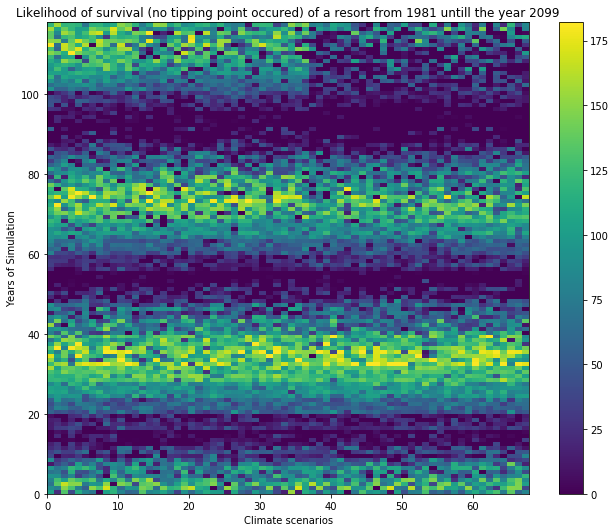

In [111]:
fig, (ax0) = plt.subplots(1, 1, figsize=(9.5,7.5))

c = ax0.pcolor(df_sum_max_Matrix)
cb = fig.colorbar(c)
ax0.set_title('default: no edges')


ax0.set_xlabel("Climate scenarios")
ax0.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

## All scenarios,  worst case (min good snow conditions)

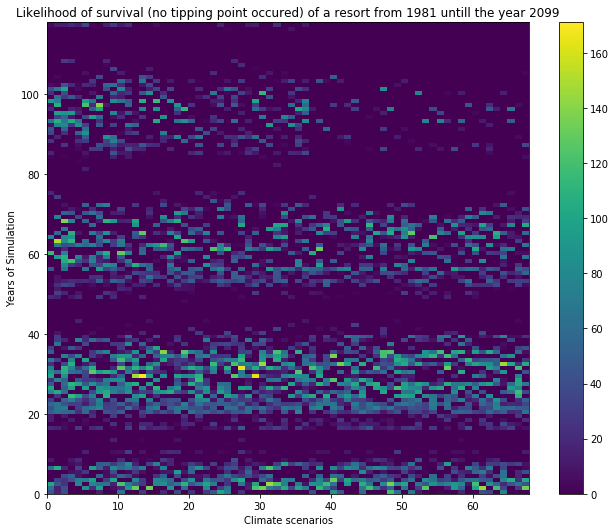

In [107]:
fig, (ax) = plt.subplots(1, 1, figsize=(9.5,7.5))

c = ax.pcolor(df_sum_min_Matrix)
cb = fig.colorbar(c)
ax.set_title('default: no edges')


ax.set_xlabel("Climate scenarios")
ax.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

In [79]:
df_sum_max_M_Columns= df_sum_max_M.columns

In [80]:
type(df_sum_max_M_Columns)

pandas.core.indexes.base.Index

In [92]:
#Making filter for databases
filt1 = df_sum_max_M.columns.str.contains('sc_26')
filt2 = df_sum_max_M.columns.str.contains('sc_45')
filt3 = df_sum_max_M.columns.str.contains('sc_85')

In [93]:
df1maxRCP26 = df_sum_max_M.loc[:, filt1]
df1maxRCP45 = df_sum_max_M.loc[:, filt2]
df1maxRCP85 = df_sum_max_M.loc[:, filt3]

In [94]:
df1maxRCP26Columns= df1maxRCP26.columns
df1maxRCP45Columns= df1maxRCP45.columns
df1maxRCP85Columns= df1maxRCP85.columns

In [95]:
df1maxRCP26.shape

(118, 12)

In [96]:
df1maxRCP45.shape

(118, 25)

In [97]:
df1maxRCP85.shape

(118, 31)

In [98]:
df1maxRCP26.head(4)

,isOverSnow_sc_26_1,isOverSnow_sc_26_2,isOverSnow_sc_26_3,isOverSnow_sc_26_4,isOverSnow_sc_26_5,isOverSnow_sc_26_6,isOverSnow_sc_26_7,isOverSnow_sc_26_8,isOverSnow_sc_26_9,isOverSnow_sc_26_10,isOverSnow_sc_26_11,isOverSnow_sc_26_12
0,104.0,24.0,132.0,41.0,113.0,83.0,73.0,0.0,105.0,118.0,82.0,59.0
1,88.0,78.0,149.0,129.0,78.0,54.0,151.0,131.0,171.0,116.0,63.0,96.0
2,70.0,135.0,166.0,149.0,150.0,74.0,96.0,92.0,151.0,2.0,147.0,137.0
3,79.0,127.0,101.0,140.0,126.0,119.0,134.0,72.0,109.0,82.0,128.0,75.0


In [101]:
df1maxRCP26_Matrix = df1maxRCP26.to_numpy()
df1maxRCP45_Matrix = df1maxRCP45.to_numpy()
df1maxRCP85_Matrix = df1maxRCP85.to_numpy()

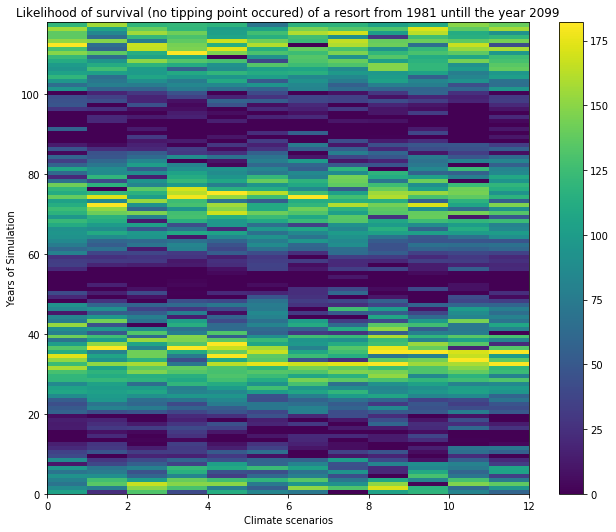

In [102]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1maxRCP26_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

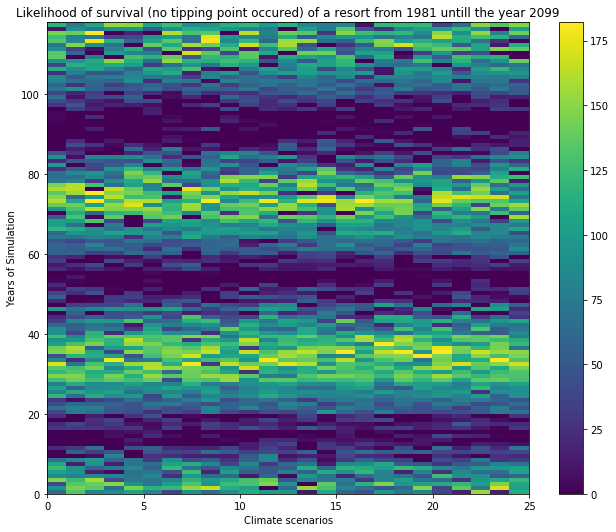

In [103]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1maxRCP45_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()

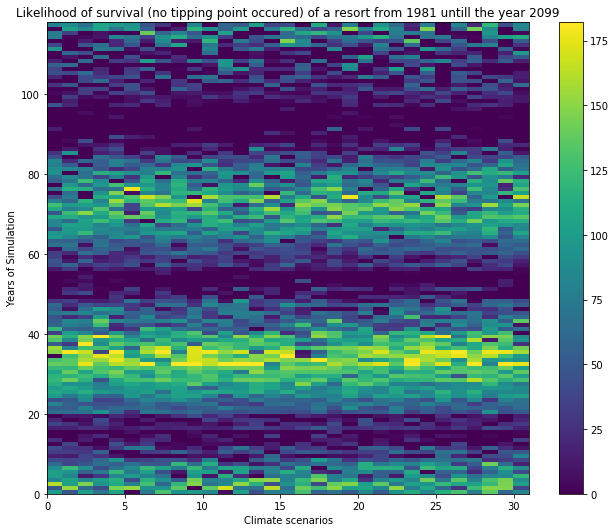

In [104]:
fig, (ax3) = plt.subplots(1, 1, figsize=(9.5,7.5))

c3 = ax3.pcolor(df1maxRCP85_Matrix)
cb3 = fig.colorbar(c3)
ax3.set_title('default: no edges')


ax3.set_xlabel("Climate scenarios")
ax3.set_ylabel("Years of Simulation")
plt.title("Likelihood of survival (no tipping point occured) of a resort from {} untill the year {}".format(1981, 2099))

fig.tight_layout()
plt.show()